In [26]:
# Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import json
%matplotlib inline

######################## DATASETS #####################################
#  https://www.kaggle.com/marlesson/myanimelist-dataset-animes-profiles-reviews
#       project data_animes.csv         
#       project_data_profiles.csv
#       project_data_reviews.csv
# ------------------------------------------------------------------------------------

In [2]:
df_profile = pd.read_csv('data/project_data_profiles.csv', sep=',')
df_profile.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [3]:
df_anime = pd.read_csv('data/project data_animes.csv', sep=',')
# rename column "uid" to "anime_uid"
df_anime = df_anime.rename(columns={'uid': 'anime_uid'})
df_anime.head()

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [43]:
df_review= pd.read_csv('data/project_data_reviews.csv', sep=',')
df_review.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [5]:
# -------------------------------- Join/merge datasets ------------------------------------------------

In [6]:
anime_review_data=pd.merge(df_anime,df_review,on='anime_uid',suffixes= ['', '_review'])
anime_full_data = pd.merge(anime_review_data, df_profile, on='profile', suffixes=['','_profile'])
anime_full_data.head()

,anime_uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,...,uid,profile,text,score_review,scores,link_review,gender,birthday,favorites_anime,link_profile
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
1,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
2,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
4,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,...,253664,skrn,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn


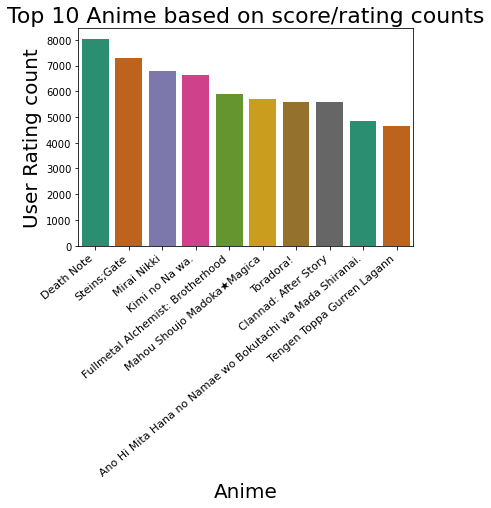

In [50]:
# Creating a dataframe that shows top 10 anime based on score counts
def TopTenBasedOnScore():
 
    combine_anime_rating = anime_full_data.dropna(axis = 0, subset = ['title'])
    anime_ratingCount = (combine_anime_rating.
                        groupby(by=['title'])['score_review'].count().
                        reset_index().rename(columns = {'score':'totalScoreCount'})
                        [['title','score_review']])
    #Plotting the bar plot for top 10 anime as per rating 
    top10_animerating=anime_ratingCount[['title', 'score_review']].sort_values(by = 'score_review',ascending = False).head(10)
    ax=sns.barplot(x="title", y="score_review", data=top10_animerating, palette="Dark2")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
    ax.set_title('Top 10 Anime based on score/rating counts',fontsize = 22)
    ax.set_xlabel('Anime',fontsize = 20) 
    ax.set_ylabel('User Rating count', fontsize = 20)
   
TopTenBasedOnScore()

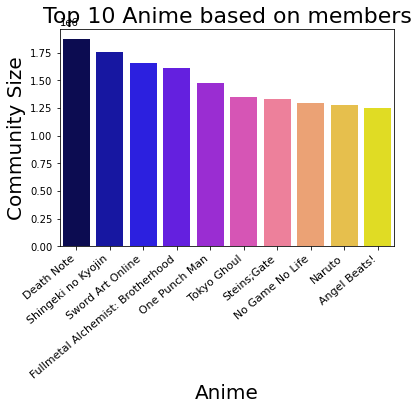

In [51]:
# Creating a dataframe that shows top 10 anime based on Community size
def TopTenBasedOnCommunitySize():
    duplicate_anime=anime_full_data.copy()
    duplicate_anime.drop_duplicates(subset ="title", 
                         keep = 'first', inplace = True)
    #Plotting bar plot               
    top10_animemembers=duplicate_anime[['title', 'members']].sort_values(by = 'members',ascending = False).head(10)
    ax=sns.barplot(x="title", y="members", data=top10_animemembers, palette="gnuplot2")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
    ax.set_title('Top 10 Anime based on members',fontsize = 22)
    ax.set_xlabel('Anime',fontsize = 20) 
    ax.set_ylabel('Community Size', fontsize = 20)
TopTenBasedOnCommunitySize()

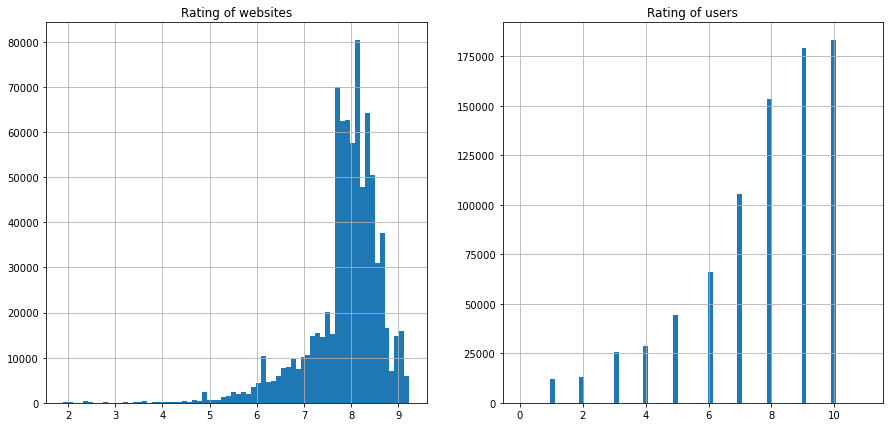

In [58]:
def RatingGraph(): 
    #Distribution of ratings
    plt.figure(figsize = (15, 7))
    plt.subplot(1,2,1)
    anime_full_data['score'].hist(bins=70)
    plt.title("Rating of websites")
    plt.subplot(1,2,2)
    anime_full_data['score_review'].hist(bins=70)
    plt.title("Rating of users")
RatingGraph()